In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, f1_score

In [2]:
#Load the training data and view
df = pd.read_csv('training_data.csv')
df

,ip_header_byte_2,ip_header_byte_3,ip_header_byte_4,ip_header_byte_5,ip_header_byte_6,ip_header_byte_7,ip_header_byte_8,ip_header_byte_10,ip_header_byte_11,tcp_header_byte_4,...,tcp_segment_data_byte_1451,tcp_segment_data_byte_1452,tcp_segment_data_byte_1453,tcp_segment_data_byte_1454,tcp_segment_data_byte_1455,tcp_segment_data_byte_1456,tcp_segment_data_byte_1457,tcp_segment_data_byte_1458,tcp_segment_data_byte_1459,Label
0,0.000000,0.156863,0.388235,0.278431,0.25098,0,0.501961,0.733333,0.207843,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,0.000000,0.156863,0.027451,0.164706,0.25098,0,0.501961,0.090196,0.325490,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,0.000000,0.203922,0.980392,0.078431,0.25098,0,0.243137,0.796078,0.764706,0.411765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web Attack
3,0.000000,0.156863,0.356863,0.658824,0.25098,0,0.494118,0.164706,0.235294,0.807843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
4,0.000000,0.156863,0.254902,0.929412,0.25098,0,0.501961,0.862745,0.560784,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0.011765,0.082353,0.462745,0.984314,0.25098,0,0.501961,0.262745,0.247059,0.929412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infiltration
1125,0.000000,0.235294,0.596078,0.603922,0.25098,0,0.243137,0.176471,0.211765,0.517647,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Port Scan
1126,0.000000,0.203922,0.737255,0.517647,0.25098,0,0.243137,0.035294,0.329412,0.090196,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS
1127,0.000000,0.156863,0.133333,0.254902,0.25098,0,0.501961,0.949020,0.752941,0.549020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


#Exploring the Data Set

In [3]:
#Check shape of dataset for # of rows & # of columns
df.shape

(1129, 1526)

In [4]:
#Understand the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Columns: 1526 entries, ip_header_byte_2 to Label
dtypes: float64(1518), int64(7), object(1)
memory usage: 13.1+ MB


In [5]:
#Show the count of each label (benign vs malicious)
df['Label'].value_counts()

,count
Label,
Benign,542
Brute Force,109
Web Attack,99
Infiltration,99
DoS,98
Port Scan,93
DDoS,88


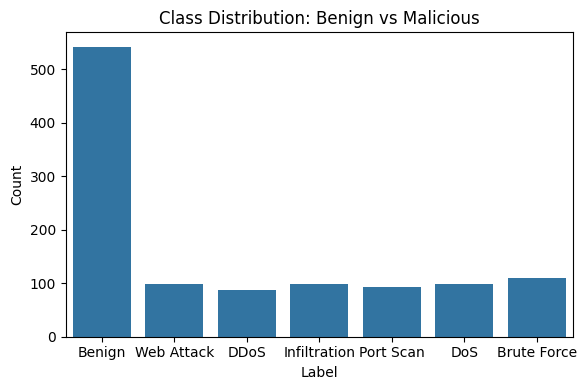

In [6]:
#Plot the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=df)
plt.title("Class Distribution: Benign vs Malicious")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [7]:
#Getting information about each feature
df.describe()

,ip_header_byte_2,ip_header_byte_3,ip_header_byte_4,ip_header_byte_5,ip_header_byte_6,ip_header_byte_7,ip_header_byte_8,ip_header_byte_10,ip_header_byte_11,tcp_header_byte_4,...,tcp_segment_data_byte_1450,tcp_segment_data_byte_1451,tcp_segment_data_byte_1452,tcp_segment_data_byte_1453,tcp_segment_data_byte_1454,tcp_segment_data_byte_1455,tcp_segment_data_byte_1456,tcp_segment_data_byte_1457,tcp_segment_data_byte_1458,tcp_segment_data_byte_1459
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.0,1129.000000,1129.000000,1129.000000,1129.000000,...,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,0.001219,0.223658,0.337078,0.498956,0.240977,0.0,0.406183,0.550676,0.505497,0.648156,...,0.000723,0.001422,0.000744,0.000636,0.000747,0.000396,0.000911,0.000567,0.001380,0.000289
std,0.010971,0.145767,0.242898,0.296289,0.049120,0.0,0.127803,0.307626,0.285589,0.290706,...,0.018577,0.034654,0.021765,0.020343,0.025104,0.011497,0.022013,0.018685,0.032809,0.006874
min,0.000000,0.015686,0.000000,0.000000,0.000000,0.0,0.137255,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.156863,0.149020,0.239216,0.250980,0.0,0.243137,0.294118,0.258824,0.396078,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.156863,0.294118,0.505882,0.250980,0.0,0.501961,0.627451,0.513725,0.858824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.203922,0.458824,0.760784,0.250980,0.0,0.501961,0.815686,0.749020,0.858824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.356863,0.996078,1.000000,1.000000,0.250980,0.0,0.501961,1.000000,1.000000,1.000000,...,0.576471,0.988235,0.721569,0.682353,0.843137,0.380392,0.611765,0.627451,0.819608,0.176471


In [8]:
#Check for any missing values
df.isnull().sum()

,0
ip_header_byte_2,0
ip_header_byte_3,0
ip_header_byte_4,0
ip_header_byte_5,0
ip_header_byte_6,0
...,...
tcp_segment_data_byte_1456,1
tcp_segment_data_byte_1457,1
tcp_segment_data_byte_1458,1
tcp_segment_data_byte_1459,1


In [9]:
#Dropping any of the rows with associated null values to prevent any skew
df.dropna(inplace=True)
df

,ip_header_byte_2,ip_header_byte_3,ip_header_byte_4,ip_header_byte_5,ip_header_byte_6,ip_header_byte_7,ip_header_byte_8,ip_header_byte_10,ip_header_byte_11,tcp_header_byte_4,...,tcp_segment_data_byte_1451,tcp_segment_data_byte_1452,tcp_segment_data_byte_1453,tcp_segment_data_byte_1454,tcp_segment_data_byte_1455,tcp_segment_data_byte_1456,tcp_segment_data_byte_1457,tcp_segment_data_byte_1458,tcp_segment_data_byte_1459,Label
0,0.000000,0.156863,0.388235,0.278431,0.25098,0,0.501961,0.733333,0.207843,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,0.000000,0.156863,0.027451,0.164706,0.25098,0,0.501961,0.090196,0.325490,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,0.000000,0.203922,0.980392,0.078431,0.25098,0,0.243137,0.796078,0.764706,0.411765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web Attack
3,0.000000,0.156863,0.356863,0.658824,0.25098,0,0.494118,0.164706,0.235294,0.807843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
4,0.000000,0.156863,0.254902,0.929412,0.25098,0,0.501961,0.862745,0.560784,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,0.000000,0.203922,0.807843,0.894118,0.25098,0,0.243137,0.964706,0.952941,0.396078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web Attack
1124,0.011765,0.082353,0.462745,0.984314,0.25098,0,0.501961,0.262745,0.247059,0.929412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infiltration
1125,0.000000,0.235294,0.596078,0.603922,0.25098,0,0.243137,0.176471,0.211765,0.517647,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Port Scan
1126,0.000000,0.203922,0.737255,0.517647,0.25098,0,0.243137,0.035294,0.329412,0.090196,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS


#Prepare the data

In [10]:
#Before splitting, extract features (X) and labels (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [11]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# I chose an 80/20 train-test split because it's a good balance and large sample size

#First Model

In [12]:
#Decision Tree
model_DTC = DecisionTreeClassifier(ccp_alpha=0, random_state=0).fit(X_train, y_train)

#Fitting a pruned Decision Tree Classifier using ccp_alpha = 0 to reduce overfitting

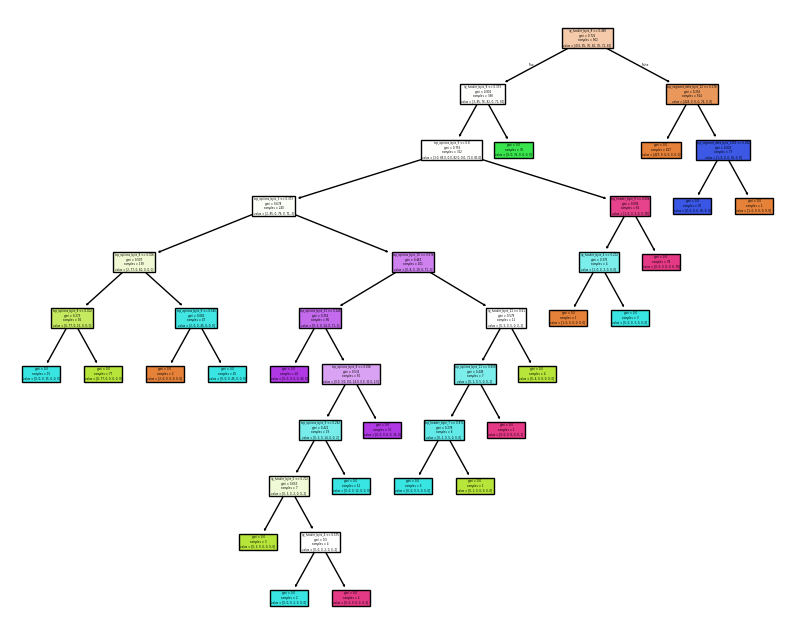

In [13]:
plt.figure(figsize=(10, 8))
plot_tree(model_DTC, filled=True, feature_names=X.columns)
plt.show()

In [14]:
#Evaluate the First Decision Tree Model
y_hat_DTC = model_DTC.predict(X_test)
accuracy_score(y_test, y_hat_DTC)

0.9778761061946902

In [15]:
#Look at Confusion Matrix
confusion_matrix = pd.crosstab(y_test, y_hat_DTC, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted     Benign  Brute Force  DDoS  DoS  Infiltration  Port Scan  \
Actual                                                                  
Benign           110            0     0    0             1          0   
Brute Force        0           23     0    1             0          0   
DDoS               0            0    12    0             0          0   
DoS                0            0     0   16             0          0   
Infiltration       0            0     0    0            23          0   
Port Scan          0            1     0    0             0         21   
Web Attack         0            1     0    1             0          0   

Predicted     Web Attack  
Actual                    
Benign                 0  
Brute Force            0  
DDoS                   0  
DoS                    0  
Infiltration           0  
Port Scan              0  
Web Attack            16  


In [16]:
#Classification Report
classification_report(y_test, y_hat_DTC)

'              precision    recall  f1-score   support\n\n      Benign       1.00      0.99      1.00       111\n Brute Force       0.92      0.96      0.94        24\n        DDoS       1.00      1.00      1.00        12\n         DoS       0.89      1.00      0.94        16\nInfiltration       0.96      1.00      0.98        23\n   Port Scan       1.00      0.95      0.98        22\n  Web Attack       1.00      0.89      0.94        18\n\n    accuracy                           0.98       226\n   macro avg       0.97      0.97      0.97       226\nweighted avg       0.98      0.98      0.98       226\n'

In [17]:
#Get feature importances and sort them
importances = model_DTC.feature_importances_
indices = importances.argsort()[::-1]  # Sort in descending order

# Print the feature ranking
print("Feature ranking:")

for i in range(10):
    print(f"{i + 1}. feature {X.columns[indices[i]]} ({importances[indices[i]]})")

Feature ranking:
1. feature ip_header_byte_8 (0.43245110243289386)
2. feature tcp_segment_data_byte_12 (0.1940769473423433)
3. feature tcp_options_byte_8 (0.13007263096389793)
4. feature tcp_options_byte_9 (0.12117957357588131)
5. feature tcp_options_byte_3 (0.06966319721096025)
6. feature tcp_options_byte_10 (0.01337834260793449)
7. feature tcp_options_byte_11 (0.009990278536847247)
8. feature tcp_header_byte_9 (0.009440701493042629)
9. feature ip_header_byte_4 (0.005344144632156279)
10. feature ip_header_byte_11 (0.004917802852596502)


#Second Model

In [18]:
#Random Forest
model_RFC = RandomForestClassifier(n_estimators=90, random_state=0).fit(X_train, y_train)

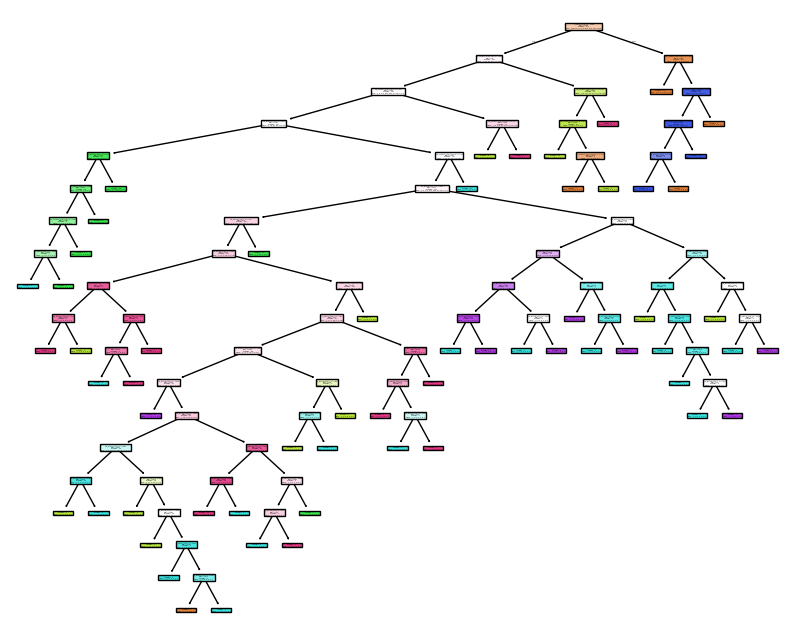

In [19]:
#Plot a single tree from the Random Forest
plt.figure(figsize=(10, 8))
plot_tree(model_RFC.estimators_[0], filled=True, feature_names=X.columns)
plt.show()

In [20]:
#Evaluate the Second Decision Tree Model
y_hat_RFC = model_RFC.predict(X_test)
accuracy_score(y_test, y_hat_RFC)

0.9601769911504425

In [21]:
#Confusion Matric
confusion_matrix = pd.crosstab(y_test, y_hat_RFC, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted     Benign  Brute Force  DDoS  DoS  Infiltration  Port Scan  \
Actual                                                                  
Benign           107            0     0    2             2          0   
Brute Force        0           23     0    1             0          0   
DDoS               0            0    12    0             0          0   
DoS                0            0     0   15             0          1   
Infiltration       0            0     0    0            23          0   
Port Scan          0            0     0    1             0         21   
Web Attack         0            0     0    2             0          0   

Predicted     Web Attack  
Actual                    
Benign                 0  
Brute Force            0  
DDoS                   0  
DoS                    0  
Infiltration           0  
Port Scan              0  
Web Attack            16  


In [22]:
#Class Report
classification_report(y_test, y_hat_RFC)

'              precision    recall  f1-score   support\n\n      Benign       1.00      0.96      0.98       111\n Brute Force       1.00      0.96      0.98        24\n        DDoS       1.00      1.00      1.00        12\n         DoS       0.71      0.94      0.81        16\nInfiltration       0.92      1.00      0.96        23\n   Port Scan       0.95      0.95      0.95        22\n  Web Attack       1.00      0.89      0.94        18\n\n    accuracy                           0.96       226\n   macro avg       0.94      0.96      0.95       226\nweighted avg       0.97      0.96      0.96       226\n'

In [23]:
#Get feature importances and sort them
importances = model_RFC.feature_importances_
indices = importances.argsort()[::-1]  # Sort in descending order

# Print the feature ranking
print("Feature ranking:")

for i in range(10):
    print(f"{i + 1}. feature {X.columns[indices[i]]} ({importances[indices[i]]})")

Feature ranking:
1. feature ip_header_byte_8 (0.06871634506783873)
2. feature tcp_options_byte_9 (0.0473999172229655)
3. feature tcp_header_byte_15 (0.0453529345674034)
4. feature tcp_options_byte_8 (0.03854406635433829)
5. feature tcp_header_byte_14 (0.03639502147280968)
6. feature tcp_header_byte_4 (0.030191136500379648)
7. feature tcp_header_byte_5 (0.029531790735807247)
8. feature tcp_options_byte_10 (0.028140112670326175)
9. feature tcp_header_byte_12 (0.027997274885882426)
10. feature tcp_options_byte_3 (0.02757082157647689)


#Bonus Model

In [24]:
#Logistic Regression
model_LR = LogisticRegression(max_iter=1000, random_state=0).fit(X_train, y_train)

#Predict and evaluate
y_hat_LR = model_LR.predict(X_test)

#Accuracy and F1 Score
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_hat_LR))
print("Logistic Regression F1 Score:", f1_score(y_test, y_hat_LR, average='weighted'))

Logistic Regression Accuracy: 0.8672566371681416
Logistic Regression F1 Score: 0.8642848254609602


In [25]:
confusion_matrix_df = pd.crosstab(y_test, y_hat_DTC, rownames=['Actual'], colnames=['Predicted']) # Assign to a new name
print(confusion_matrix_df)

Predicted     Benign  Brute Force  DDoS  DoS  Infiltration  Port Scan  \
Actual                                                                  
Benign           110            0     0    0             1          0   
Brute Force        0           23     0    1             0          0   
DDoS               0            0    12    0             0          0   
DoS                0            0     0   16             0          0   
Infiltration       0            0     0    0            23          0   
Port Scan          0            1     0    0             0         21   
Web Attack         0            1     0    1             0          0   

Predicted     Web Attack  
Actual                    
Benign                 0  
Brute Force            0  
DDoS                   0  
DoS                    0  
Infiltration           0  
Port Scan              0  
Web Attack            16  


In [26]:
#Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_hat_LR))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      Benign       0.92      0.95      0.93       111
 Brute Force       0.86      0.75      0.80        24
        DDoS       0.78      0.58      0.67        12
         DoS       0.47      0.44      0.45        16
Infiltration       0.96      0.96      0.96        23
   Port Scan       0.91      0.95      0.93        22
  Web Attack       0.76      0.89      0.82        18

    accuracy                           0.87       226
   macro avg       0.81      0.79      0.79       226
weighted avg       0.86      0.87      0.86       226



#ROC Curve

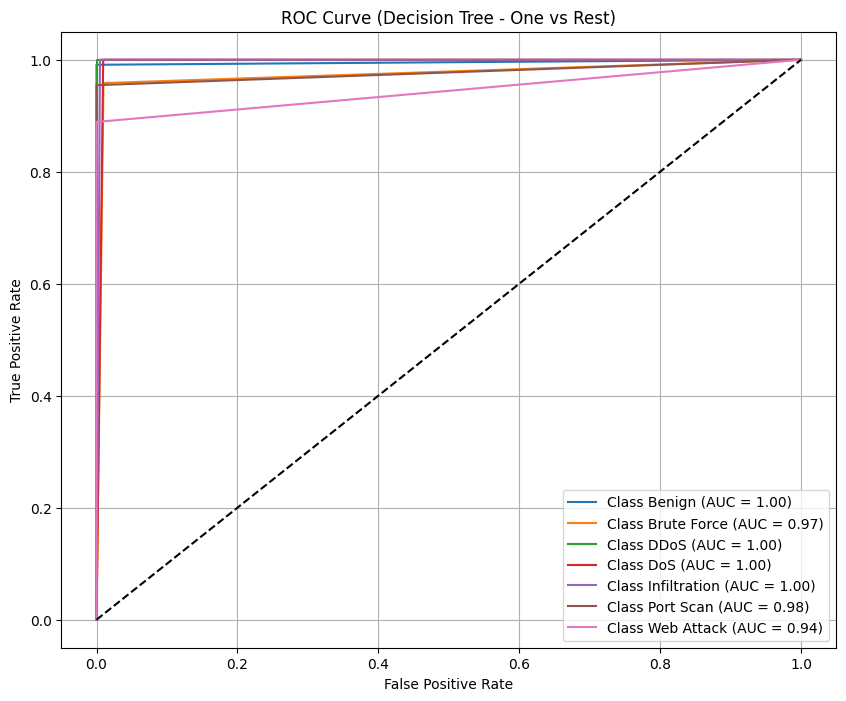

In [27]:
#Binarize the labels
classes = sorted(y_test.unique())
y_test_bin = label_binarize(y_test, classes=classes)

#Get predicted probabilities from Decision Tree
y_proba_dt = model_DTC.predict_proba(X_test)

#Compute ROC curve and AUC for each class
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()

for i in range(len(classes)):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_bin[:, i], y_proba_dt[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

#Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    plt.plot(fpr_dt[i], tpr_dt[i], label=f"Class {classes[i]} (AUC = {roc_auc_dt[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree - One vs Rest)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

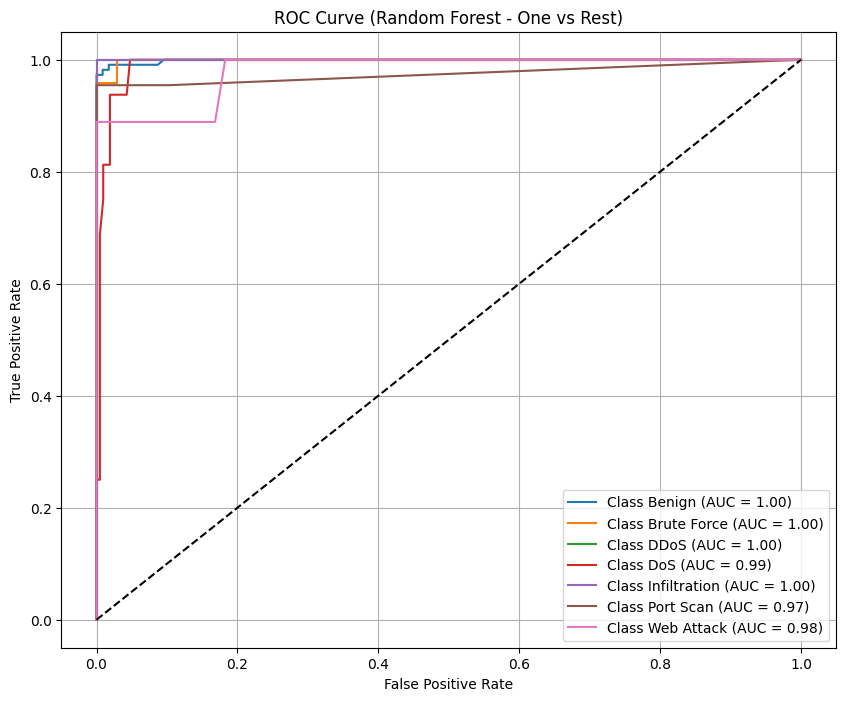

In [28]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize labels for OvR ROC curves
classes = sorted(y_test.unique())
y_test_bin = label_binarize(y_test, classes=classes)

# Get predicted probabilities
y_proba_rf = model_RFC.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest - One vs Rest)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#Best Model

In [29]:
#Comparing all the models
print("Decision Tree Accuracy:", accuracy_score(y_test, y_hat_DTC))
print("Random Forest Accuracy:", accuracy_score(y_test, y_hat_RFC))

Decision Tree Accuracy: 0.9778761061946902
Random Forest Accuracy: 0.9601769911504425


In [30]:
#Print F1 scores for each model
print("Decision Tree F1 Score:", f1_score(y_test, y_hat_DTC, average='weighted'))
print("Random Forest F1 Score:", f1_score(y_test, y_hat_RFC, average='weighted'))

Decision Tree F1 Score: 0.9779971689927197
Random Forest F1 Score: 0.9619844272772083


In [31]:
#Confusion Matrix for Decision Tree
print("Decision Tree Confusion Matrix:")
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
print(sk_confusion_matrix(y_test, y_hat_DTC))
print()

Decision Tree Confusion Matrix:
[[110   0   0   0   1   0   0]
 [  0  23   0   1   0   0   0]
 [  0   0  12   0   0   0   0]
 [  0   0   0  16   0   0   0]
 [  0   0   0   0  23   0   0]
 [  0   1   0   0   0  21   0]
 [  0   1   0   1   0   0  16]]



In [32]:
#Confusion Matrix for Random Forest
print("Random Forest Confusion Matrix:")
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
print(sk_confusion_matrix(y_test, y_hat_RFC))
print()

Random Forest Confusion Matrix:
[[107   0   0   2   2   0   0]
 [  0  23   0   1   0   0   0]
 [  0   0  12   0   0   0   0]
 [  0   0   0  15   0   1   0]
 [  0   0   0   0  23   0   0]
 [  0   0   0   1   0  21   0]
 [  0   0   0   2   0   0  16]]



In [33]:
# Classification Report for Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_hat_DTC))
print()

Decision Tree Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.99      1.00       111
 Brute Force       0.92      0.96      0.94        24
        DDoS       1.00      1.00      1.00        12
         DoS       0.89      1.00      0.94        16
Infiltration       0.96      1.00      0.98        23
   Port Scan       1.00      0.95      0.98        22
  Web Attack       1.00      0.89      0.94        18

    accuracy                           0.98       226
   macro avg       0.97      0.97      0.97       226
weighted avg       0.98      0.98      0.98       226




In [34]:
# Classification Report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_hat_RFC))
print()

Random Forest Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.96      0.98       111
 Brute Force       1.00      0.96      0.98        24
        DDoS       1.00      1.00      1.00        12
         DoS       0.71      0.94      0.81        16
Infiltration       0.92      1.00      0.96        23
   Port Scan       0.95      0.95      0.95        22
  Web Attack       1.00      0.89      0.94        18

    accuracy                           0.96       226
   macro avg       0.94      0.96      0.95       226
weighted avg       0.97      0.96      0.96       226




#Preparing Test Data Predictions

In [35]:
test_unlabeled = pd.read_csv("testing_data.csv")


y_hat_final = model_RFC.predict(test_unlabeled)

submission = pd.DataFrame({'y_hat': y_hat_final})
submission.to_csv("Assignment2_Predictions.csv", index=False)